## Some basic plotting experiments

This notebook contains some basic plotting experiments, and explores a few libraries available in Python.  We start with the familiar matplotlib, and attempt to clean-up its presentation.


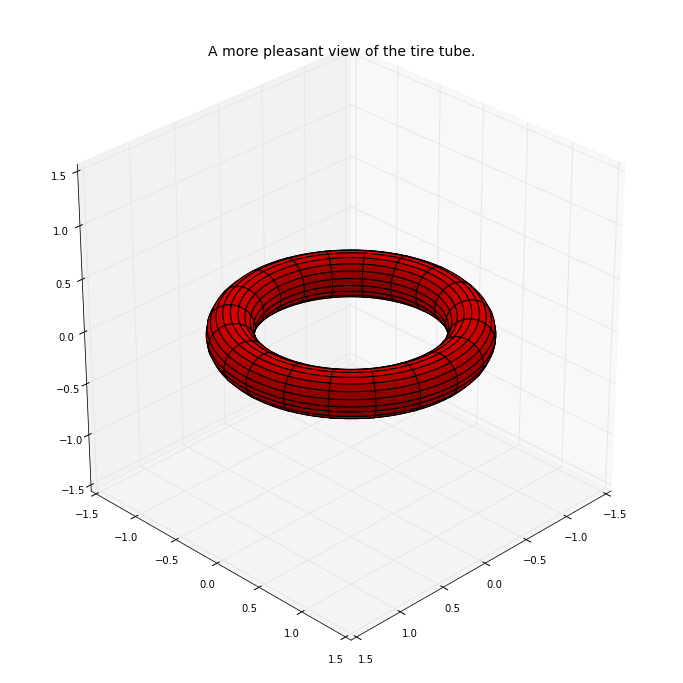

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')

t1 = np.linspace(0, 2*np.pi, 100)
t2 = np.linspace(0, 2*np.pi, 100)

## we use outer to form a doubly-indexed list of numbers.
## alternatively one could form the doubly-index list
## beforehand...
bigR = 1.0
smR = 0.2
x1 = np.outer( (bigR+smR*np.cos(t1)), np.cos(t2) )
y1 = np.outer( (bigR+smR*np.cos(t1)), np.sin(t2) )
z1 = np.outer( smR*np.sin(t1), np.ones(np.size(t2)) ) 

ax.set_title('A more pleasant view of the tire tube.', fontsize=14)
ax.plot_surface(x1, y1, z1, rstride=5,cstride=5, color='r', shade=True)

## here is a fairly nice way to set a common aspect ratio
scl = np.array([getattr(ax,'get_{}lim'.format(dim))() for dim in 'xyz'])
ax.auto_scale_xyz(*[[np.min(scl),np.max(scl)]]*3)

## elev sets how far up from the xy-plane we arein.
## azim is the angle from the xz-plane
ax.view_init(elev=30,azim=45)
plt.show()

You might say *that's nice* **but** it's also a little primitive.  If you would like to get serious about creating pleasing plots in Python, there are some more serious visualization libraries available.

 * Mayavi (http://docs.enthought.com/mayavi/mayavi) available with apt-get install mayavi2
 * VPython (http://www.vpython.org) available with apt-get install python-visual
 * VisPy (http://vispy.org) install via sudo pip install vispy
 * Python SciTools (https://github.com/hplgit/scitools) available with apt-get install python-scitools
 * Visualization Toolkit VTK (http://www.vtk.org/) available with apt-get install python-vtk (for version 5) and  python-vtk6 for version 6.  
 
My initial impression is VTK, Mayavi and Python SciTools have the most pleasing and flexible rendering engine, with Mayavi being particularly easy to use.  All three use the VTK library.  The VTK library has good documentation on-line but it is something of a *power user* visualization toolkit, where one might have to write a significant amount of code to get your displays *just right*.   

A significant problem is VTK only supports Python 2 at present, and so Mayavi also requires Python 2.  Python SciTools uses several visualisation engines, and runs on both Python 2 and 3.  But the Mayavi engine will not run in Python 3. 

The *vispy* toolkit works in Python 3 and Python 2. It is very powerful and is independent from the VTK library.  The primary feature of vispy is it uses the CPU on your graphics adapter -- the *GPU*.  This allows vispy to render much larger data sets than the other visualisation libraries. vispy appears to be under heavy development at present, as such, you can expect to find implementation errors in the code.  Installation of vispy can be a bit fussy, as it requires several libraries (and gives you too many options to consider, some of which are extremely large libraries).  For the graphics back-end I suggest *only* installing the pyglfw library, and install it with pip.  In python 3, that would be *sudo pip3 install pyglfw*.  Avoid installing this library with apt-get or synaptic as it appears the Ubuntu repository is a little out of date.  You might want to install vispy by compiling its source code, available on the vispy git repository, as I have found version 0.4.0 of vispy (available via apt-get) has some glaring defects.

The other libraries strive more for convenience, rather than flexibility and precision.  In my initial explorations I've found Mayavi the best compromise between ease-of-use and informative graphics.  But perhaps vispy is the most enticing.

Below we include a sampling of each of these libraries, and links to further examples for those libraries.

In [2]:
## A VPython sample.  This appears to be much like a basic rendering package
## unfortunately.  Due to VTK restrictions, requires Python 2.
import visual as v
redbox = v.box(pos=v.vector(4,2,3),size=(8,4,6),color=v.color.red)
ball=v.sphere(pos=v.vector(4,7,3),radius=2,color=v.color.green)

ImportError: No module named 'visual'

In [3]:
## A Mayavi sample. This appears far more sophisticated than VPython.
## Due to VTK restrictions, requires Python 2.

import numpy as np
from mayavi import mlab

## increments pi/250.
dphi, dtheta = np.pi/250.0, np.pi/250.0
## this specifies a 2-dimensional grid. It takes a list of elements of the
## form ak:bk:sk the length of which is the dimension of the grid.  ak is
## the left endpoint, bk the right, sk the step size.
[phi,theta] = np.mgrid[0:np.pi+dphi*1.5:dphi,0:2*np.pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = np.sin(m0*phi)**m1 + np.cos(m2*phi)**m3 + np.sin(m4*theta)**m5 + np.cos(m6*theta)**m7
x = r*np.sin(phi)*np.cos(theta)
y = r*np.cos(phi)
z = r*np.sin(phi)*np.sin(theta)

# View it.
s = mlab.mesh(x, y, z)
mlab.show()

ImportError: No module named 'mayavi'

For more Mayavi examples, see the [Mayavi notebook](mayavi.eg.ipynb). 

In [5]:
## Mandelbrot

from vispy import app, gloo

# Shader source code
# -----------------------------------------------------------------------------
vertex = """
attribute vec2 position;
void main()
{
    gl_Position = vec4(position, 0, 1.0);
}
"""

fragment = """
uniform vec2 resolution;
uniform vec2 center;
uniform float scale;
vec3 hot(float t)
{
    return vec3(smoothstep(0.00,0.33,t),
                smoothstep(0.33,0.66,t),
                smoothstep(0.66,1.00,t));
}
void main()
{
    
    const int n = 4000;
    const float log_2 = 0.6931471805599453;
    vec2 c;
    // Recover coordinates from pixel coordinates
    c.x = (gl_FragCoord.x / resolution.x - 0.5) * scale + center.x;
    c.y = (gl_FragCoord.y / resolution.y - 0.5) * scale + center.y;
    float x, y, d;
    int i;
    vec2 z = c;
    for(i = 0; i < n; ++i)
    {
        x = (z.x*z.x - z.y*z.y) + c.x;
        y = (z.y*z.x + z.x*z.y) + c.y;
        d = x*x + y*y;
        if (d > 4.0) break;
        z = vec2(x,y);
    }
    if ( i < n ) {
        float nu = log(log(sqrt(d))/log_2)/log_2;
        float index = float(i) + 1.0 - nu;
        float v = pow(index/float(n),0.5);
        gl_FragColor = vec4(hot(v),1.0);
    } else {
        gl_FragColor = vec4(hot(0.0),1.0);
    }
}
"""


# vispy Canvas
# -----------------------------------------------------------------------------
class Canvas(app.Canvas):

    def __init__(self, *args, **kwargs):
        app.Canvas.__init__(self, *args, **kwargs)
        self.program = gloo.Program(vertex, fragment)

        # Draw a rectangle that takes up the whole screen. All of the work is
        # done in the shader.
        self.program["position"] = [(-1, -1), (-1, 1), (1, 1),
                                    (-1, -1), (1, 1), (1, -1)]

        self.scale = self.program["scale"] = 3
        self.center = self.program["center"] = [-0.5, 0]
        self.apply_zoom()

        self.bounds = [-2, 2]
        self.min_scale = 0.00001
        self.max_scale = 4

        gloo.set_clear_color(color='black')

        self._timer = app.Timer('auto', connect=self.update, start=True)

        self.show()

    def on_draw(self, event):
        self.program.draw()

    def on_resize(self, event):
        self.apply_zoom()

    def apply_zoom(self):
        width, height = self.physical_size
        gloo.set_viewport(0, 0, width, height)
        self.program['resolution'] = [width, height]

    def on_mouse_move(self, event):
        """Pan the view based on the change in mouse position."""
        if event.is_dragging and event.buttons[0] == 1:
            x0, y0 = event.last_event.pos[0], event.last_event.pos[1]
            x1, y1 = event.pos[0], event.pos[1]
            X0, Y0 = self.pixel_to_coords(float(x0), float(y0))
            X1, Y1 = self.pixel_to_coords(float(x1), float(y1))
            self.translate_center(X1 - X0, Y1 - Y0)

    def translate_center(self, dx, dy):
        """Translates the center point, and keeps it in bounds."""
        center = self.center
        center[0] -= dx
        center[1] -= dy
        center[0] = min(max(center[0], self.bounds[0]), self.bounds[1])
        center[1] = min(max(center[1], self.bounds[0]), self.bounds[1])
        self.program["center"] = self.center = center

    def pixel_to_coords(self, x, y):
        """Convert pixel coordinates to Mandelbrot set coordinates."""
        rx, ry = self.size
        nx = (x / rx - 0.5) * self.scale + self.center[0]
        ny = ((ry - y) / ry - 0.5) * self.scale + self.center[1]
        return [nx, ny]

    def on_mouse_wheel(self, event):
        """Use the mouse wheel to zoom."""
        delta = event.delta[1]
        if delta > 0:  # Zoom in
            factor = 0.9
        elif delta < 0:  # Zoom out
            factor = 1 / 0.9
        for _ in range(int(abs(delta))):
            self.zoom(factor, event.pos)

    def on_key_press(self, event):
        """Use + or - to zoom in and out.
        The mouse wheel can be used to zoom, but some people don't have mouse
        wheels :)
        """

        if event.text == '+' or event.text == '=':
            self.zoom(0.9)
        elif event.text == '-':
            self.zoom(1/0.9)

    def zoom(self, factor, mouse_coords=None):
        """Factors less than zero zoom in, and greater than zero zoom out.
        If mouse_coords is given, the point under the mouse stays stationary
        while zooming. mouse_coords should come from MouseEvent.pos.
        """
        if mouse_coords is not None:  # Record the position of the mouse
            x, y = float(mouse_coords[0]), float(mouse_coords[1])
            x0, y0 = self.pixel_to_coords(x, y)

        self.scale *= factor
        self.scale = max(min(self.scale, self.max_scale), self.min_scale)
        self.program["scale"] = self.scale

        # Translate so the mouse point is stationary
        if mouse_coords is not None:
            x1, y1 = self.pixel_to_coords(x, y)
            self.translate_center(x1 - x0, y1 - y0)


if __name__ == '__main__':
    canvas = Canvas(size=(800, 800), keys='interactive')
    app.run()
    

ImportError: No module named 'vispy'

In [6]:
## These examples are buggy in vispy 0.4.0.  You will have to download the development version 0.5.0 from
## the git repository to make it work, at present:
##  
##  git clone https://github.com/vispy/vispy.git
##  cd vispy
##  sudo python setup.py install

"""
Plot data with different styles
"""

import numpy as np

from vispy import plot as vp

fig = vp.Fig(size=(600, 500), show=False)

# Plot the target square wave shape 
x = np.linspace(0, 10, 1000)
y = np.zeros(1000)
y[1:500] = 1
y[500:-1] = -1
line = fig[0, 0].plot((x, y), width=3, color='k',
                      title='Square Wave Fourier Expansion', xlabel='x', 
                      ylabel='4/π Σ[ 1/n sin(nπx/L) | n=1,3,5,...]')

y = np.zeros(1000)
L = 5
colors = [(0.8, 0, 0, 1),
          (0.8, 0, 0.8, 1),
          (0, 0, 1.0, 1),
          (0, 0.7, 0, 1), ]
plot_nvals = [1, 3, 7, 31]
for i in range(16):
    n = i * 2 + 1
    y += (4. / np.pi) * (1. / n) * np.sin(n * np.pi * x / L)
    if n in plot_nvals:
        l = fig[0, 0].plot((x, y), color=colors[plot_nvals.index(n)], width=2)
        l.update_gl_state(depth_test=False)

labelgrid = fig[0, 0].view.add_grid(margin=10)
hspacer = vp.Widget()
hspacer.stretch = (6, 1)
labelgrid.add_widget(hspacer, row=0, col=0)

box = vp.Widget(bgcolor=(1, 1, 1, 0.6), border_color='k')
labelgrid.add_widget(box, row=0, col=1)

vspacer = vp.Widget()
vspacer.stretch = (1, 2)
labelgrid.add_widget(vspacer, row=1, col=1)

labels = [vp.Label('n=%d' % plot_nvals[i], color=colors[i], anchor_x='left')
          for i in range(len(plot_nvals))]
boxgrid = box.add_grid()
for i, label in enumerate(labels):
    boxgrid.add_widget(label, row=i, col=0)
hspacer2 = vp.Widget()
hspacer2.stretch = (4, 1)
boxgrid.add_widget(hspacer2, row=0, col=1)

grid = vp.visuals.GridLines(color=(0, 0, 0, 0.5))
grid.set_gl_state('translucent')
fig[0, 0].view.add(grid)


if __name__ == '__main__':
    fig.show(run=True)

ImportError: No module named 'vispy'

In [7]:
## gives current vispy version -- ideally you will have 0.5.0 installed.
import vispy
vispy.version_info

ImportError: No module named 'vispy'

In [8]:
import numpy as np

# You can use either matplotlib or vispy to render this example:
# import matplotlib.pyplot as plt
import vispy.mpl_plot as plt

from vispy.io import read_png, load_data_file

n = 200
freq = 10
fs = 100.
t = np.arange(n) / fs
tone = np.sin(2*np.pi*freq*t)
noise = np.random.RandomState(0).randn(n)
signal = tone + noise
magnitude = np.abs(np.fft.fft(signal))
freqs = np.fft.fftfreq(n, 1. / fs)
flim = n // 2

# Signal
fig = plt.figure()
ax = plt.subplot(311)
ax.imshow(read_png(load_data_file('pyplot/logo.png')))

ax = plt.subplot(312)
ax.plot(t, signal, 'k-')

# Frequency content
ax = plt.subplot(313)
idx = np.argmax(magnitude[:flim])
ax.text(freqs[idx], magnitude[idx], 'Max: %s Hz' % freqs[idx],
        verticalalignment='top')
ax.plot(freqs[:flim], magnitude[:flim], 'k-o')

plt.draw()

# NOTE: show() has currently been overwritten to convert to vispy format, so:
# 1. It must be called to show the results, and
# 2. Any plotting commands executed after this will not take effect.
# We are working to remove this limitation.

if __name__ == '__main__':
    plt.show(True)

ImportError: No module named 'vispy'